# folium 실습

## 실습 준비

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns
import folium
plt.rc('font', family='Pretendard')

## 데이터 불러오기

In [7]:
df = pd.read_csv("C:/Users/smart/CodingClone/DataVIsualization/Data/공연예술시설정보.csv")

In [8]:
df

,fclty_id,fclty_nm,area_addr,ctprvn_cd,ctprvn_nm,signgu_cd,signgu_nm,adstrd_cd,adstrd_nm,fclty_la,fclty_lo
0,KP0001,396커피 컴퍼니,경상북도 안동시 옥동길 32 (옥동),37,경상북도,37040,안동시,3704060,옥동,36.560047,128.699928
1,KP0002,KBS홀 [부산],부산광역시 수영구 수영로 429 (남천동 63) KBS부산방송총국,21,부산광역시,21140,수영구,2114051,남천1동,35.144806,129.107595
2,KP0003,VOFOL(보폴),서울특별시 광진구 동일로 170 (화양동),11,서울특별시,11050,광진구,1105053,화양동,37.547205,127.067074
3,KP0004,가톨릭청년회관,서울특별시 마포구 월드컵북로2길 49 (동교동),11,서울특별시,11140,마포구,1114066,서교동,37.557221,126.923036
4,KP0005,가나의집열림홀,서울특별시 종로구 대학로3길 9 (연지동),11,서울특별시,11010,종로구,1101063,종로5·6가동,37.573987,127.001322
...,...,...,...,...,...,...,...,...,...,...,...
1809,KP1812,복합공간 에무,서울특별시 종로구 경희궁1가길 7 (신문로2가),11,서울특별시,11010,종로구,1101053,사직동,37.572072,126.969035
1810,KP1813,비오케이아트센터(BOK아트센터),세종특별자치시 국책연구원3로 12 (반곡동),29,세종특별자치시,29010,세종특별자치시,2901065,소담동,36.492362,127.303271
1811,KP1814,뮤지스땅스,서울 마포구 아현동 600-2,11,서울특별시,11140,마포구,1114078,아현동,37.554990,126.957587
1812,KP1815,아산시청 시민홀,충남 아산시 시민로 456 아산시청 본관 3.5층 대강당,34,충청남도,34040,아산시,3404051,온양1동,36.790013,127.002474


In [9]:
df.columns

Index(['fclty_id', 'fclty_nm', 'area_addr', 'ctprvn_cd', 'ctprvn_nm',
       'signgu_cd', 'signgu_nm', 'adstrd_cd', 'adstrd_nm', 'fclty_la',
       'fclty_lo'],
      dtype='object')

In [10]:
df.columns = ['시설ID', '시설명', '지역주소', '시도코드', '시도명', 
              '시군구코드', '시군구명', '행정동코드', '행정동명', '건축시설위도', '건축시설경도']

In [15]:
df

,시설ID,시설명,지역주소,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,건축시설위도,건축시설경도
0,KP0001,396커피 컴퍼니,경상북도 안동시 옥동길 32 (옥동),37,경상북도,37040,안동시,3704060,옥동,36.560047,128.699928
1,KP0002,KBS홀 [부산],부산광역시 수영구 수영로 429 (남천동 63) KBS부산방송총국,21,부산광역시,21140,수영구,2114051,남천1동,35.144806,129.107595
2,KP0003,VOFOL(보폴),서울특별시 광진구 동일로 170 (화양동),11,서울특별시,11050,광진구,1105053,화양동,37.547205,127.067074
3,KP0004,가톨릭청년회관,서울특별시 마포구 월드컵북로2길 49 (동교동),11,서울특별시,11140,마포구,1114066,서교동,37.557221,126.923036
4,KP0005,가나의집열림홀,서울특별시 종로구 대학로3길 9 (연지동),11,서울특별시,11010,종로구,1101063,종로5·6가동,37.573987,127.001322
...,...,...,...,...,...,...,...,...,...,...,...
1809,KP1812,복합공간 에무,서울특별시 종로구 경희궁1가길 7 (신문로2가),11,서울특별시,11010,종로구,1101053,사직동,37.572072,126.969035
1810,KP1813,비오케이아트센터(BOK아트센터),세종특별자치시 국책연구원3로 12 (반곡동),29,세종특별자치시,29010,세종특별자치시,2901065,소담동,36.492362,127.303271
1811,KP1814,뮤지스땅스,서울 마포구 아현동 600-2,11,서울특별시,11140,마포구,1114078,아현동,37.554990,126.957587
1812,KP1815,아산시청 시민홀,충남 아산시 시민로 456 아산시청 본관 3.5층 대강당,34,충청남도,34040,아산시,3404051,온양1동,36.790013,127.002474


In [11]:
df_raw = df
art_locations = df

## 전국 기준으로 추출

In [12]:
art_locations = art_locations[["건축시설위도", "건축시설경도", "시설명"]]

In [13]:
art_locations

,건축시설위도,건축시설경도,시설명
0,36.560047,128.699928,396커피 컴퍼니
1,35.144806,129.107595,KBS홀 [부산]
2,37.547205,127.067074,VOFOL(보폴)
3,37.557221,126.923036,가톨릭청년회관
4,37.573987,127.001322,가나의집열림홀
...,...,...,...
1809,37.572072,126.969035,복합공간 에무
1810,36.492362,127.303271,비오케이아트센터(BOK아트센터)
1811,37.554990,126.957587,뮤지스땅스
1812,36.790013,127.002474,아산시청 시민홀


In [14]:
map = folium.Map(location=[art_locations.건축시설위도.mean(), art_locations.건축시설경도.mean()], zoom_start=14, control_scale=True)

In [15]:
map

In [16]:
for index, location_info in art_locations.iterrows():
    folium.Marker([location_info["건축시설위도"], location_info["건축시설경도"]], popup=location_info["시설명"]).add_to(map)

In [17]:
map

### 서울 기준으로 추출

In [18]:
df1 = df[['시도명', '시군구명', '시설명', '건축시설위도', '건축시설경도']]

In [19]:
df1

,시도명,시군구명,시설명,건축시설위도,건축시설경도
0,경상북도,안동시,396커피 컴퍼니,36.560047,128.699928
1,부산광역시,수영구,KBS홀 [부산],35.144806,129.107595
2,서울특별시,광진구,VOFOL(보폴),37.547205,127.067074
3,서울특별시,마포구,가톨릭청년회관,37.557221,126.923036
4,서울특별시,종로구,가나의집열림홀,37.573987,127.001322
...,...,...,...,...,...
1809,서울특별시,종로구,복합공간 에무,37.572072,126.969035
1810,세종특별자치시,세종특별자치시,비오케이아트센터(BOK아트센터),36.492362,127.303271
1811,서울특별시,마포구,뮤지스땅스,37.554990,126.957587
1812,충청남도,아산시,아산시청 시민홀,36.790013,127.002474


In [20]:
seoul = df1.loc[df1['시도명'] == '서울특별시']

In [21]:
seoul

,시도명,시군구명,시설명,건축시설위도,건축시설경도
2,서울특별시,광진구,VOFOL(보폴),37.547205,127.067074
3,서울특별시,마포구,가톨릭청년회관,37.557221,126.923036
4,서울특별시,종로구,가나의집열림홀,37.573987,127.001322
7,서울특별시,종로구,갤러리롤랑,37.588283,126.981371
12,서울특별시,마포구,공상온도,37.557679,126.919785
...,...,...,...,...,...
1806,서울특별시,종로구,샘터파랑새극장,37.581561,127.002362
1807,서울특별시,종로구,한국불교역사문화기념관,37.574494,126.982017
1808,서울특별시,종로구,오디오가이스튜디오,37.578077,126.973711
1809,서울특별시,종로구,복합공간 에무,37.572072,126.969035


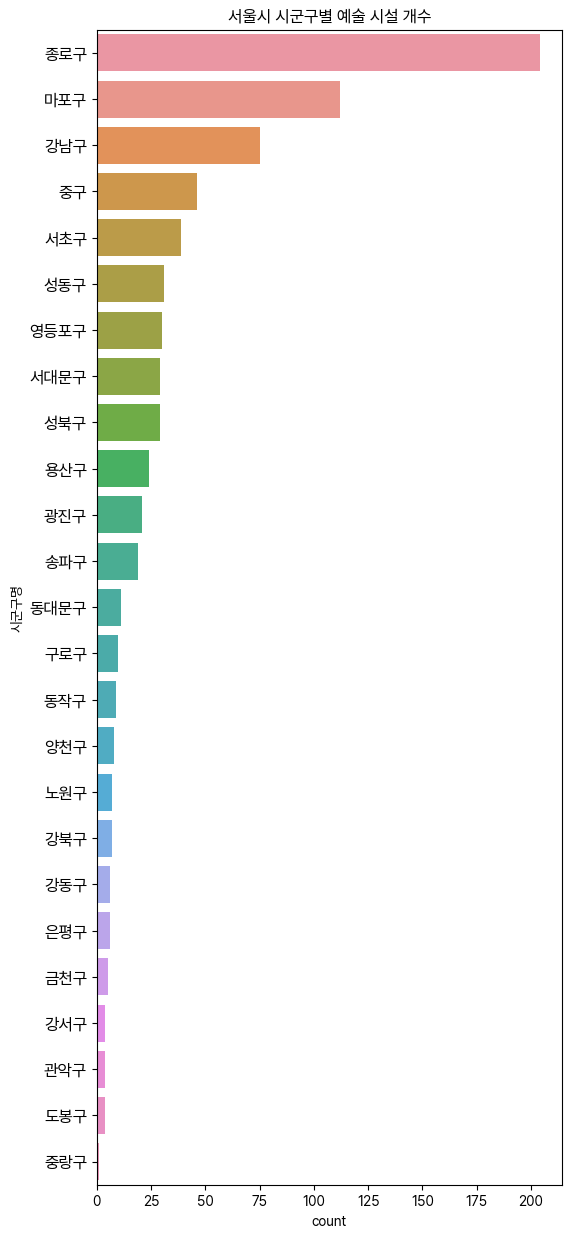

In [22]:
plt.figure(figsize=(6, 15))
sns.countplot(y=seoul['시군구명'], order=seoul['시군구명'].value_counts().index)
plt.yticks(fontsize=12)
plt.title('서울시 시군구별 예술 시설 개수')
plt.show()

In [23]:
seoul_art = seoul

In [24]:
seoul_art

,시도명,시군구명,시설명,건축시설위도,건축시설경도
2,서울특별시,광진구,VOFOL(보폴),37.547205,127.067074
3,서울특별시,마포구,가톨릭청년회관,37.557221,126.923036
4,서울특별시,종로구,가나의집열림홀,37.573987,127.001322
7,서울특별시,종로구,갤러리롤랑,37.588283,126.981371
12,서울특별시,마포구,공상온도,37.557679,126.919785
...,...,...,...,...,...
1806,서울특별시,종로구,샘터파랑새극장,37.581561,127.002362
1807,서울특별시,종로구,한국불교역사문화기념관,37.574494,126.982017
1808,서울특별시,종로구,오디오가이스튜디오,37.578077,126.973711
1809,서울특별시,종로구,복합공간 에무,37.572072,126.969035


### json 불러오기

In [25]:
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)
seoul_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [26]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=12, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

In [27]:
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(seoul_art['건축시설위도'], seoul_art['건축시설경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)

m

In [28]:
seoul_group_data = seoul.groupby('시군구명')['시설명'].count()

In [29]:
seoul_group_data

시군구명
강남구      75
강동구       6
강북구       7
강서구       4
관악구       4
광진구      21
구로구      10
금천구       5
노원구       7
도봉구       4
동대문구     11
동작구       9
마포구     112
서대문구     29
서초구      39
성동구      31
성북구      29
송파구      19
양천구       8
영등포구     30
용산구      24
은평구       6
종로구     204
중구       46
중랑구       1
Name: 시설명, dtype: int64

In [30]:
# 1. map을 만든다 
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m

In [31]:
# 코드입력
m.choropleth(geo_data=seoul_geo,
             data=seoul_group_data, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 예술 시설 수"
            )
m

C:\Users\smart\AppData\Local\Programs\Python\Python39\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [32]:
# 코드입력
bins = list(seoul_group_data.quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=seoul_group_data, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 예술 시설 수", 
             bins=bins
            )
m

C:\Users\smart\AppData\Local\Programs\Python\Python39\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [33]:
m.save('map.html')